In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("aggregated.json") as f:
    data = json.loads(f.read())

## How often are benchmarks not cited?

In [3]:
def used_any_benchmark(d):
    not_custom = [s for s in d["whichdata"] if s != "custom" and s != "custom simulated"]
    return len(not_custom) > 0

ub = 0
ubnc = 0
for d in data:
    if used_any_benchmark(d):
        ub = ub + 1
        if d["didcite"] != "all" and d["didcite"] != "":
            ubnc = ubnc + 1
        if d["didcite"] == "":
            print(d["ind"], "needs filling")
            
print(ub, "papers found that used a benchmark")
print(ubnc, "of those missed or improperly cited at least one of those benchmarks")
print("That's {:0.1f} per cent!".format(100*ubnc/ub))

108 needs filling
459 needs filling
185 papers found that used a benchmark
52 of those missed or improperly cited at least one of those benchmarks
That's 28.1 per cent!


## How often is custom data used?

In [4]:
def used_custom_data(d):
    not_custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(not_custom) > 0

du = 0
dure = 0
for d in data:
    if used_custom_data(d):
        du = du + 1
        if d["didpublish"] != "no" and d["didpublish"] != "":
            dure = dure + 1
        if d["didpublish"] == "":
            print(d["ind"], "needs filling")
            
print(du, "papers found that used custom data")
print(dure, "of those released or promised to release their data")
print("That's {:0.1f} per cent!".format(100*dure/du))

2 needs filling
73 needs filling
102 needs filling
167 needs filling
321 needs filling
362 needs filling
418 needs filling
437 needs filling
264 papers found that used custom data
13 of those released or promised to release their data
That's 4.9 per cent!


## How often are MICCAI papers cited?

65 needs reviewing
87 needs reviewing
166 needs reviewing
[243.66666667]


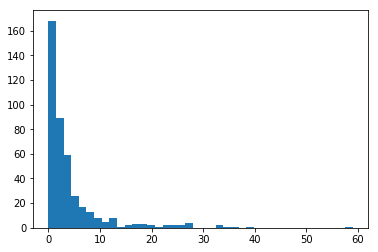

4.753238546603476


In [5]:
citations = []
for d in data:
    if used_custom_data(d) or used_any_benchmark(d):
        try:
            citations = citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
            
cits = np.sort(np.array(citations))
print(cits[cits > 100])
plt.hist(cits[cits <= 100], bins=40)
plt.show()
print(np.mean(cits))

## What if we partition by benchmark vs custom?

65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... []
Total: 195
5.695897435897436


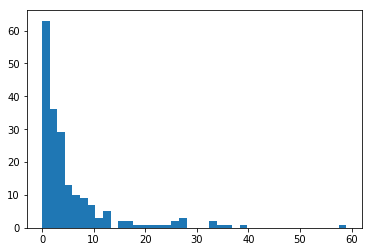



Excluding... [243.66666667]
Total: 227
2.8867841409691626


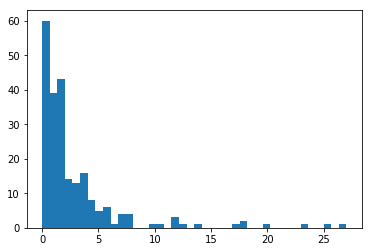



Excluding... []
Total: 11
9.5


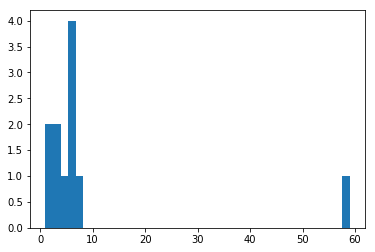

In [6]:
def used_custom_nore(d):
    custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(custom) == len(d["whichdata"]) and d["didpublish"] == "no" 

def used_custom_re(d):
    custom = [s for s in d["whichdata"] if s == "custom" or s == "custom simulated"]
    return len(custom) == len(d["whichdata"]) and d["didpublish"] != "no" and d["didpublish"] != ""

bnch_citations = []
cstm_citations = []
csre_citations = []
for d in data:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    if used_custom_re(d):
        try:
            csre_citations = csre_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom and release
csre_cits = np.sort(np.array(csre_citations))
print("Excluding...", csre_cits[csre_cits > 100])
print("Total:", csre_cits[csre_cits <= 100].shape[0])
print(np.mean(csre_cits[csre_cits <= 100]))
plt.hist(csre_cits[csre_cits <= 100], bins=40)
plt.show()


## What if we partition by releasing code or no?

65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... [243.66666667]
Total: 32
8.153125


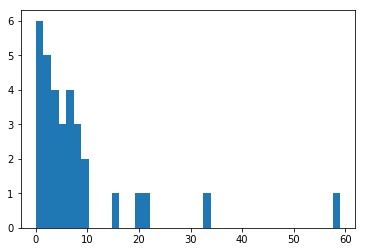



Excluding... []
Total: 389
3.859383033419024


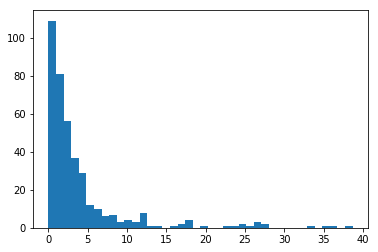

In [7]:
def released_code(d):
    return d["code"] == "on"

bnch_citations = []
cstm_citations = []
for d in data:
    if not used_custom_data(d) and not used_any_benchmark(d):
        continue
    if released_code(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()


## What if we partition by open access vs no?

65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... [243.66666667]
Total: 372
4.392921146953404


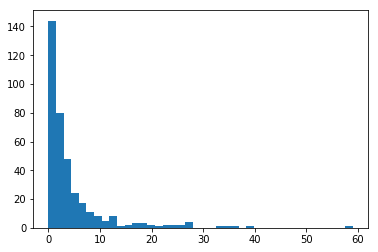



Excluding... []
Total: 49
2.6129251700680274


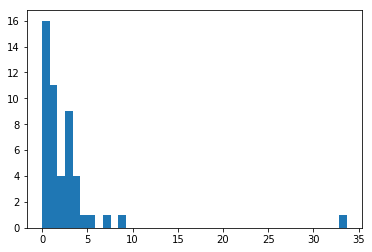

In [8]:
def open_access(d):
    return "on" in d["preprint"] + d["personal"]

bnch_citations = []
cstm_citations = []
for d in data:
    if not used_custom_data(d) and not used_any_benchmark(d):
        continue
    if open_access(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()


## How's public benchmark use over time?

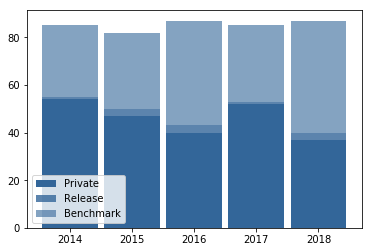

In [9]:
bnch_counts = [0 for _ in range(5)]
cstm_counts = [0 for _ in range(5)]
csre_counts = [0 for _ in range(5)]

for d in data:
    year = 4 - 2018 + int(d["year"])
    if used_any_benchmark(d):
        try:
            bnch_counts[year] = bnch_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_nore(d):
        try:
            cstm_counts[year] = cstm_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    elif used_custom_re(d):
        try:
            csre_counts[year] = csre_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")

years = range(2014, 2019)
plt.bar(years, cstm_counts, 0.9, color=(0.2, 0.4, 0.6, 1.0))
plt.bar(years, csre_counts, 0.9, bottom=cstm_counts, color=(0.2, 0.4, 0.6, 0.8))
plt.bar(years, bnch_counts, 0.9, bottom=np.array(cstm_counts) + np.array(csre_counts), color=(0.2, 0.4, 0.6, 0.6))
plt.legend(["Private", "Release", "Benchmark"], loc="lower left")
plt.show()


## How's code release over time?

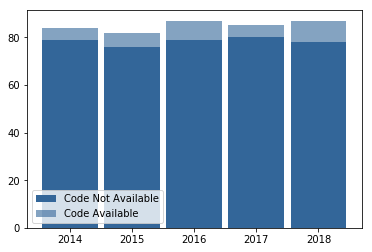

2014 0.05952380952380952
2015 0.07317073170731707
2016 0.09195402298850575
2017 0.058823529411764705
2018 0.10344827586206896


In [10]:
bnch_counts = [0 for _ in range(5)]
cstm_counts = [0 for _ in range(5)]

for d in data:
    year = 4 - 2018 + int(d["year"])
    if not used_custom_data(d) and not used_any_benchmark(d):
        continue
    if released_code(d):
        try:
            bnch_counts[year] = bnch_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")
    else:
        try:
            cstm_counts[year] = cstm_counts[year] + 1
        except ValueError:
            print(d["ind"], "needs reviewing")

years = range(2014, 2019)
plt.bar(years, cstm_counts, 0.9, color=(0.2, 0.4, 0.6, 1.0))
plt.bar(years, bnch_counts, 0.9, bottom=cstm_counts, color=(0.2, 0.4, 0.6, 0.6))
plt.legend(["Code Not Available", "Code Available", "Benchmark"], loc="lower left")
plt.show()

for i in range(5):
    print(years[i], bnch_counts[i]/(bnch_counts[i]+cstm_counts[i]))

## Log Transformed OLS Prediction of Citations

In [11]:
# Import necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [12]:
# Load data into a Pandas DataFrame
data_mat = []
target_mat = []
column_names = ["ind", "is_open_access", "did_release_code", "public_data"]
target_name = ["log_citations"]
for d in data:
    if not used_custom_data(d) and not used_any_benchmark(d):
        continue
    try:
        ind = int(d["ind"])
        years_elapsed = 2019 - int(d["year"])
        if int(d["citations"])/years_elapsed > 100:
            raise ValueError
        is_open_access = int(open_access(d))
        did_release_code = int(released_code(d))
        public_data = int(used_any_benchmark(d))
        targ_val = np.log(int(d["citations"])/years_elapsed+1)
        data_mat = data_mat + [[ind, is_open_access, did_release_code, public_data]]
        target_mat = target_mat + [targ_val]
    except ValueError:
        print("Review", d["ind"])
        
        

Review 37
Review 65
Review 87
Review 166


In [13]:
df_pred = pd.DataFrame(np.array(data_mat), columns=column_names)
df_resp = pd.DataFrame(np.array(target_mat), columns=target_name)
df_pred.describe()

ind  is_open_access  did_release_code  public_data
count  421.000000      421.000000        421.000000   421.000000
mean   250.448931        0.883610          0.076010     0.437055
std    144.008913        0.321073          0.265329     0.496612
min      2.000000        0.000000          0.000000     0.000000
25%    132.000000        1.000000          0.000000     0.000000
50%    244.000000        1.000000          0.000000     0.000000
75%    377.000000        1.000000          0.000000     1.000000
max    499.000000        1.000000          1.000000     1.000000

In [14]:
df_resp.describe()

log_citations
count     421.000000
mean        1.207123
std         0.856284
min         0.000000
25%         0.559616
50%         1.098612
75%         1.686399
max         4.094345

In [15]:
X = df_pred[["is_open_access", "did_release_code", "public_data"]]
Y = df_resp["log_citations"]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

/home/helle246/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_citations   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     10.87
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           6.87e-07
Time:                        18:28:07   Log-Likelihood:                -515.70
No. Observations:                 421   AIC:                             1039.
Df Residuals:                     417   BIC:                             1056.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7567      0.126      6.006      0.000       0.509       1.004
is_open_access       0.3213      0.126      2.548      0.011       0.073       0.569
did_release_code     0.5300      0.153      3.467      0.001       0.229       0.830
public_data          0.2887      0.082      3.527      0.000       0.128       0.450
==============================================================================
Omnibus:                       25.411   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.448
Skew:                           0.630   Prob(JB):                     6.65e-07
Kurtosis:                       3.189   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print("THIS UNDERESTIMATES THE RATIO DUE TO THE HIGH PREVALENCE OF LOW-CITATION PAPERS")
print("The log+1 has only a very small effect on most distributions, but a really large one on ours")
print("Public Data Citation increase: {1:0.1f}%.   95% CI: [{0:0.1f}%, {2:0.1f}%]".format(
    100*(np.exp(0.096)-1), # change this to given value
    100*(np.exp(model.params["public_data"])-1), 
    100*(np.exp(0.634)-1) # Change this to given value
))

THIS UNDERESTIMATES THE RATIO DUE TO THE HIGH PREVALENCE OF LOW-CITATION PAPERS
The log+1 has only a very small effect on most distributions, but a really large one on ours
Public Data Citation increase: 33.5%.   95% CI: [10.1%, 88.5%]


## What if I try controlling by restriction plus weighted sum?

OPEN ACCESS AND CODE RELEASE
Excluding... []
Total: 22
10.583333333333334


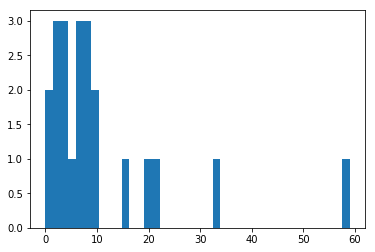



Excluding... [243.66666667]
Total: 7
3.6285714285714286


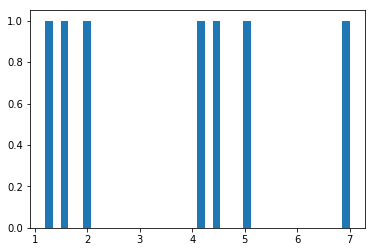

2.916666666666667
OPEN ACCESS AND NO CODE RELEASE
65 needs reviewing
87 needs reviewing
166 needs reviewing
Excluding... []
Total: 147
5.31360544217687


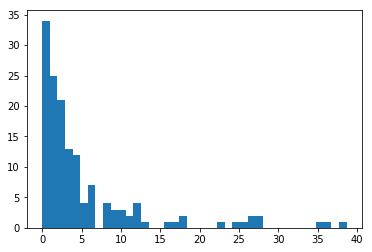



Excluding... []
Total: 197
3.0387478849407783


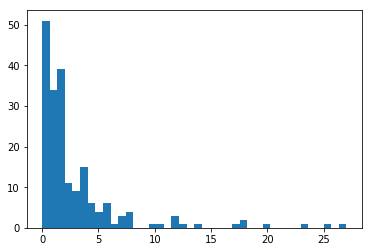

1.7486167472167327
NOT OPEN ACCESS AND CODE RELEASE
Excluding... []
Total: 2
0.6666666666666666


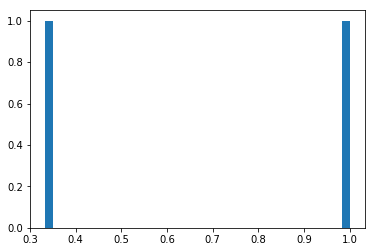



Excluding... []
Total: 1
1.3333333333333333


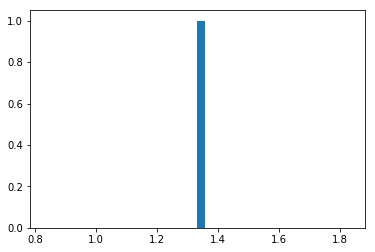

0.5
OPEN ACCESS AND NO CODE RELEASE
Excluding... []
Total: 24
3.9763888888888883


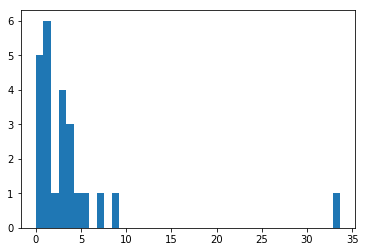



Excluding... []
Total: 22
1.3606060606060606


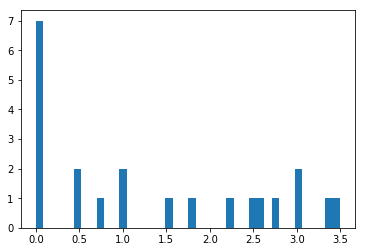

2.9225129918337043
RATIO AFTER CONTROLLING: 1.948839457531823


In [17]:
print("OPEN ACCESS AND CODE RELEASE")

agg_rat = 0
N = 0

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)

print("OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("NOT OPEN ACCESS AND CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()

rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("OPEN ACCESS AND NO CODE RELEASE")

bnch_citations = []
cstm_citations = []
n = 0
for d in [d for d in data if not open_access(d) and not released_code(d)]:
    if used_any_benchmark(d) or used_custom_re(d):
        try:
            bnch_citations = bnch_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1
    elif used_custom_nore(d):
        try:
            cstm_citations = cstm_citations + [int(d["citations"])/(2019 - int(d["year"]))]
        except ValueError:
            print(d["ind"], "needs reviewing")
        n = n + 1

            
# First benchmark
bnch_cits = np.sort(np.array(bnch_citations))
print("Excluding...", bnch_cits[bnch_cits > 100])
print("Total:", bnch_cits[bnch_cits <= 100].shape[0])
print(np.mean(bnch_cits[bnch_cits <= 100]))
plt.hist(bnch_cits[bnch_cits <= 100], bins=40)
plt.show()

print("\n")
# Then custom no release
cstm_cits = np.sort(np.array(cstm_citations))
print("Excluding...", cstm_cits[cstm_cits > 100])
print("Total:", cstm_cits[cstm_cits <= 100].shape[0])
print(np.mean(cstm_cits[cstm_cits <= 100]))
plt.hist(cstm_cits[cstm_cits <= 100], bins=40)
plt.show()


rat = np.mean(bnch_cits[bnch_cits <= 100])/np.mean(cstm_cits[cstm_cits <= 100])
agg_rat = agg_rat + n*rat
N = N + n
print(rat)


print("RATIO AFTER CONTROLLING:", agg_rat/N)